In [1]:
from bmc.simulate import simulate

BMCTool simulation: 100%|██████████| 328/328 [00:00<00:00, 17430.21it/s]


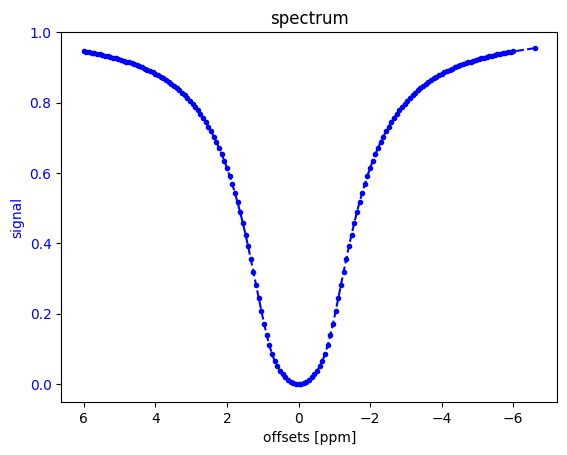

In [2]:
seq_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/default_seqid.seq'
config_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/config_1pool.yaml'

seq_path_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/default_seqid.seq'
config_path_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/config_1pool.yaml'


#simulate(config_file=config_path, seq_file=seq_path, show_plot=True)
simulate(config_file=config_path_win, seq_file=seq_path_win, show_plot=True)  # simulation windows

In [3]:
from bmc.simulate import simulate_fid

BMCTool simulation: 100%|██████████| 2/2 [00:00<00:00, 40.56it/s]


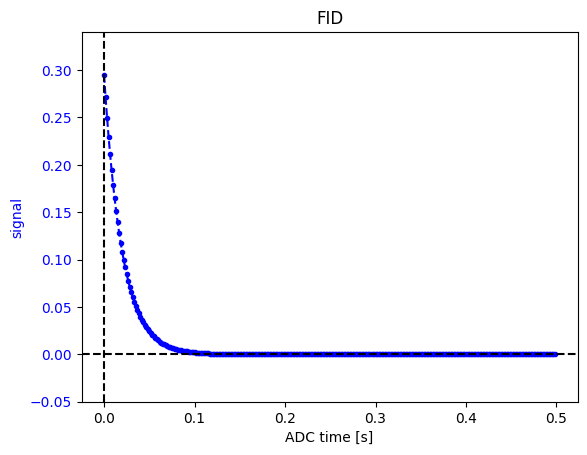

In [16]:
seq_path_gauss = '/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss.seq'
seq_path_gauss_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/simple_gauss.seq'

#simulate_fid(config_file=config_path, seq_file=seq_path_gauss, adc_time=5.0, show_plot=False)
sim = simulate_fid(config_file=config_path_win, seq_file=seq_path_gauss_win, adc_time=.5, show_plot=True)  # simulation windows

In [24]:
sim.get_magtrans()[1][:10]

array([0.29468622, 0.27112441, 0.2494465 , 0.22950186, 0.2111519 ,
       0.19426913, 0.17873623, 0.16444527, 0.15129695, 0.13919991])

In [5]:
import numpy as np

In [6]:
m_init = np.ones(6)
n_measure = 2
m_init

array([1., 1., 1., 1., 1., 1.])

In [7]:
m_out = np.zeros([m_init.shape[0], n_measure])

In [8]:
m_init.shape

(6,)

In [9]:
mag = m_init[np.newaxis, :, np.newaxis]
mag.shape

(1, 6, 1)

In [10]:
for j in range((1 + 1) * 2):
                mag[0, j, 0] = 0

mag

array([[[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.]]])

In [11]:
m_out[:, 0] = np.squeeze(mag)

In [12]:
m_out

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.]])

In [13]:
m_out[5, :]

array([1., 0.])

In [14]:
t = np.linspace(0, 5, 300)
t[1]- t[0]

np.float64(0.016722408026755852)

In [15]:
tp = np.arange(0, 5, 5/300)
tp[-1]

np.float64(4.983333333333333)